In [27]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

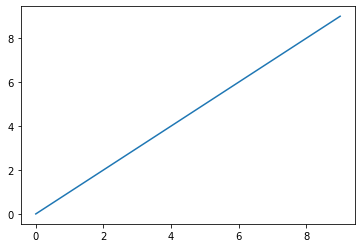

In [30]:
plt.plot(data)

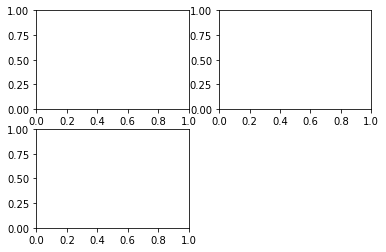

In [42]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)

ax2 = fig.add_subplot(2,2,2)

ax3 = fig.add_subplot(2,2,3)


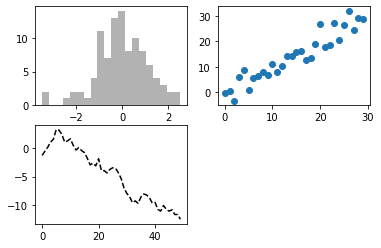

In [44]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3* np.random.randn(30))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

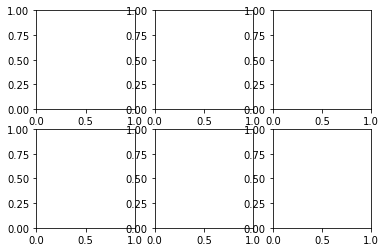

In [33]:
fig, axes = plt.subplots(2,3)
axes

### pyplot.subplot options

Argument | Description
---------|-------------
nrows | Number of rows of subplots
ncols | Number of cols of subplots
sharex | All subplots should use the same x-axis
sharey | All subplots should use the same y-axis
subplot_kw | Dict of keywords passed to ```add_subplot``` call used to create each subplot
**fig_kw | Additional keywords to subplots are used when creating the figure, such as ```plt.subplots(2,2, figsize=(8,6))```

### Adjusting the spaceing around subplots

- You can change the default spaceing using subplots_adjust method on Figure objects, also available as a topp-level function. 

- Example: ```subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)```

- ```wspace``` and ```hspace``` controls the percent of the figure width and figure height to use between subplots

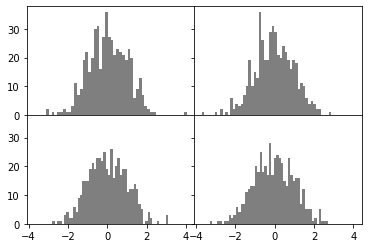

In [52]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers and line styles

- Matplotlib's main plot function accepts arrays of x and y coordinates, and optionally a string abbreviation indicateing color and line style. 

- to plot x versus y with green dashes you would execute

```ax.plot(x, y, 'g--')```

- You can also add linestyle seperately

```ax.plot(x, y, linestyle='--', color='g')```

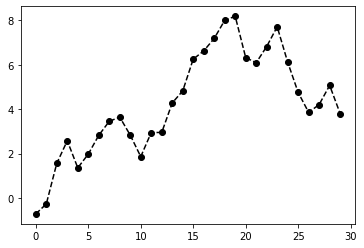

In [54]:
# additionally plots can have markers to highlight the actual data points. 
plt.plot(np.random.randn(30).cumsum(), 'ko--')

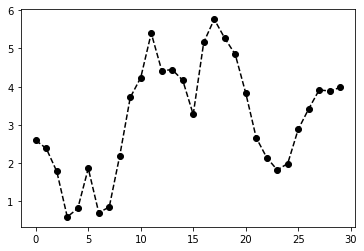

In [55]:
# this could also have been written more explicitly as

plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

Notice that subsequent points are linearly interpolated by default. 
This can be altered with the drawstyle option

In [56]:
data = np.random.randn(30).cumsum()

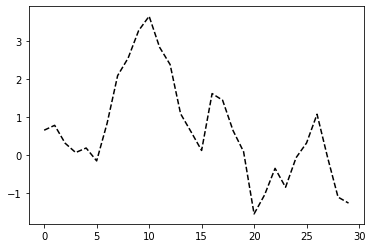

In [57]:
plt.plot(data, 'k--', label='Default')

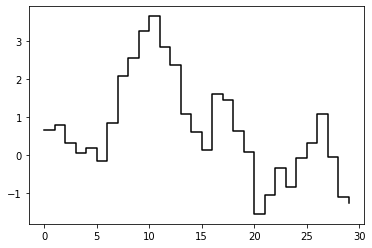

In [58]:
plt.plot(data, 'k-',drawstyle='steps-post', label='steps-post')

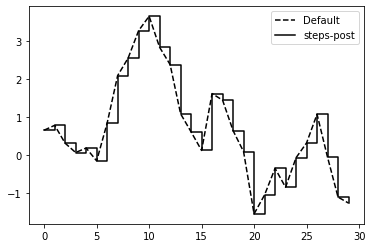

In [62]:
# we can add a legend to identify each line
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-',drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels and Legends

The pyplot interface (i.e, metplotlib.pyplot), designed for interactive use, consissts of methods like ```xlim```, ```xticks```, and ```xticklabels```. These control the plot range, tick locations, and tick labels.

They can be used in two ways: 

- Called with no arguments returns current parameter vaule (e.g, plt.xlim() returns the current x-axis plotting range)

- Called with parameters sets the prarmater vaule (e.g, plt.xlim([0,10])), sets the x-axis range to 0 to 10

All such methods act on the active or most recently created ```AxesSubplot``.

Each of them corresponds to two methods on the subplot object itself; in the case of xlim these ```are ax.get_xlim``` and ```ax.set_xlim```. 

#### Setting the title, axis labels, ticks and ticklabels

In [67]:
fig2 = plt.figure()

<Figure size 432x288 with 0 Axes>

In [68]:
ax = fig2.add_subplot(1,1,1)

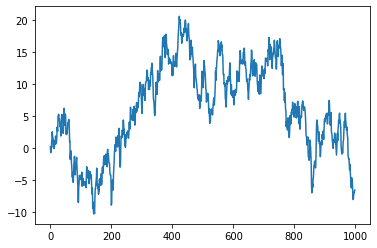

In [69]:
ax.plot(np.random.randn(1000).cumsum())
fig2

- to change x-axis ticks, its easiest to use set_xticks and set_xticklabels
- The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. 
- But we can set other vaules as the labels using set_xticklabes



In [72]:
ticks = ax.set_xticks([0,250,500,750,1000])

In [73]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [74]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

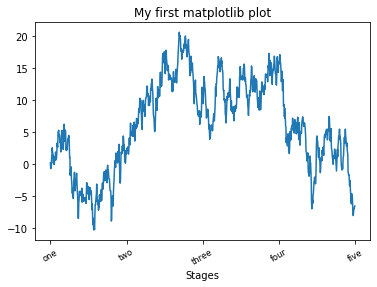

In [76]:
ax.set_xlabel('Stages')
fig2

> Modifying the y axis consist of the same process, substituting y for x. 

### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. 

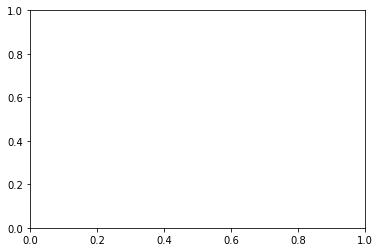

In [77]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

In [78]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

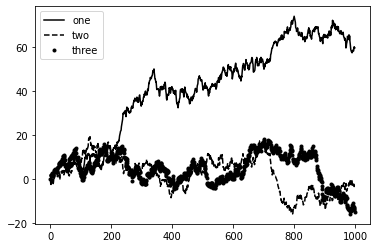

In [79]:
ax.legend(loc='best')
fig

### Annotations and Draawing on a Subplot

You can add annotations using the ```text```, ```arrow``` and ```annotate``` functions. 

- ```text``` draws text at given x,y coordinates on the plot, with optional custom styling

Example: ```ax.text(x,y, 'Hello', family='monospace', fontsize='12')```


- ```annotate``` can draw both text adn arrows (see page 270 for details)

```ax.set_title``` adds a title to the plot

Drawing shapes requires some more care. Matplotlib has objects that represent many common chapes, refferd to as patches. 

Some of these, like rectangle and circle, arefound in matplotlib.pyploy, but the full set is localted in matplotlib.patches.

To add a shape to a plot, you create the patch object ```shp``` and add it to a subplot by calling ```ax.add_patch(shp)```

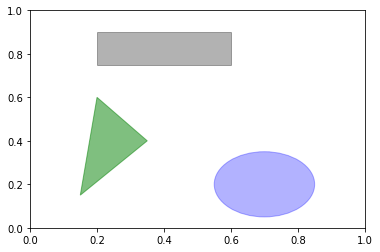

In [81]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
rect=plt.Rectangle((0.2,0.75), 0.4,0.15, color='k', alpha=0.3)
circ=plt.Circle((0.7,0.2), 0.15, color='b', alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Saving plots to file 

you can seave the ative figure to file using ```plt.savefig``` 

> ```plt.savefig('figpath.svg')```

The file type is inferred fro mthe file extension, so if you used .pdf you would get a pdf file. 

There is a couple of important options that I use frequently for publishing graphics. 

- ```pdi``` controls the dots-per-inch resolution
- ```bbox_inches``` trims the whitespace around the figure

> ```plt.savefig('figpath.svg',pdi=400,bbox_inches='tight')```




In [82]:
# PS! Savefig does not have to write to disk, it can also write to any file-like object, such as a BytesIO

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib configuration

The default behavior can be customized via an extensive set of global parameters governing figure, size, subplot spaceing, colors, font sizes, grid styles, etc. 

One way of modifying is to use the rc method

PS! This is setting global variables

> ```plt.rc('figure', figsize=(10,10))```

The first argument to rc is the compenent you widh to customize (figure, axes, xtick, grid, legend)

After this there can follow keyword arguments indicating the new parameters

> ```font_options = {'familiy' : 'monospace', 'weight':'bold', 'size':'small'}```
>
> ```plt.rc('font', **font_options)```




## Plotting with pandas and seaborn

### Line plots